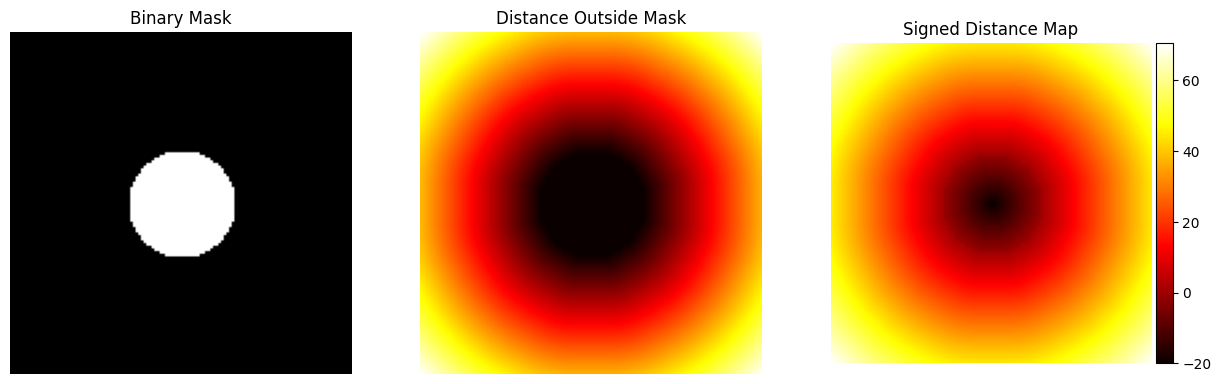

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt

# Example binary mask (replace with your actual mask)
# Let's simulate a 2D binary mask with a circular object
mask = np.zeros((128, 128), dtype=np.uint8)
yy, xx = np.mgrid[:128, :128]
mask[(yy - 64)**2 + (xx - 64)**2 < 20**2] = 1  # a circle

# Compute distance transform:
# - Inside the object: distance to the background
# - Outside the object: distance to the object (invert mask)
dist_inside = distance_transform_edt(mask)
dist_outside = distance_transform_edt(1 - mask)

# Combine inside and outside: signed distance map (optional)
signed_distance_map = dist_outside - dist_inside

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(mask, cmap='gray')
axes[0].set_title("Binary Mask")
axes[0].axis('off')

axes[1].imshow(dist_outside, cmap='hot')
axes[1].set_title("Distance Outside Mask")
axes[1].axis('off')

im = axes[2].imshow(signed_distance_map, cmap='hot')
axes[2].set_title("Signed Distance Map")
axes[2].axis('off')

# Create colorbar axis beside the last plot
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(axes[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()


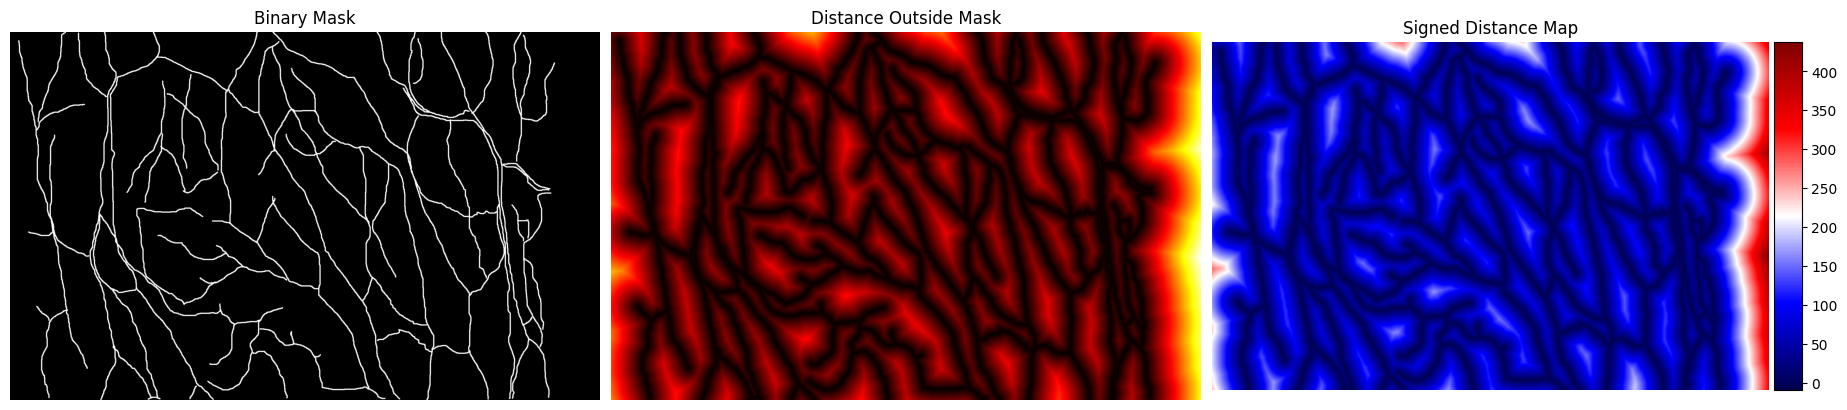

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt
from PIL import Image
import os

# Path to your mask folder
mask_dir = "/home/smadper/TFM/datasets/laticifers/masks"
mask_files = sorted(os.listdir(mask_dir))
first_mask_path = os.path.join(mask_dir, mask_files[0])

# Load and preprocess mask
mask_img = Image.open(first_mask_path).convert("L")
mask = np.array(mask_img)
binary_mask = (mask > 0).astype(np.uint8)

# Compute distance transforms
dist_inside = distance_transform_edt(binary_mask)
dist_outside = distance_transform_edt(1 - binary_mask)
signed_distance_map = dist_outside - dist_inside

# Plotting with separate colorbar axis
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

axes[0].imshow(binary_mask, cmap='gray')
axes[0].set_title("Binary Mask")
axes[0].axis('off')

axes[1].imshow(dist_outside, cmap='hot')
axes[1].set_title("Distance Outside Mask")
axes[1].axis('off')

im = axes[2].imshow(signed_distance_map, cmap='seismic')
axes[2].set_title("Signed Distance Map")
axes[2].axis('off')

# Create colorbar axis beside the last plot
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(axes[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()


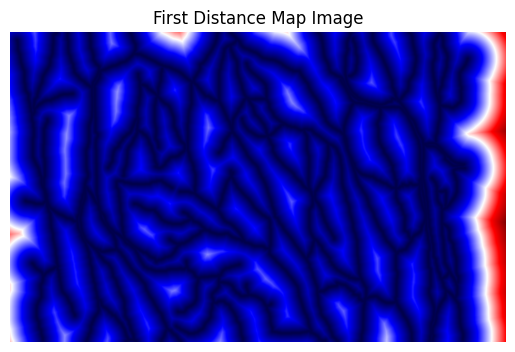

In [6]:
import os
from PIL import Image

distance_map_path = "/home/smadper/TFM/datasets/laticifers/distance_maps_img"
import matplotlib.pyplot as plt

# List files in the distance_map_path directory
distance_map_files = sorted(os.listdir(distance_map_path))
first_distance_map_path = os.path.join(distance_map_path, distance_map_files[0])

# Load and display the first image
distance_map_img = Image.open(first_distance_map_path)
plt.imshow(distance_map_img, cmap='seismic')
plt.title("First Distance Map Image")
plt.axis('off')
plt.show()


In [7]:
import torch

# Path to your saved tensor
tensor_path = '/home/smadper/TFM/datasets/laticifers/distance_maps_pt/Hoja 1-1.pt'

# Load the tensor
tensor = torch.load(tensor_path)

# Print tensor shape and values
print("Shape:", tensor.shape)
print("Min:", tensor.min().item(), "Max:", tensor.max().item())
print("Tensor values:\n", tensor)

Shape: torch.Size([1, 2400, 3840])
Min: 0.0 Max: 1.0
Tensor values:
 tensor([[[0.1843, 0.1828, 0.1813,  ..., 0.8123, 0.8141, 0.8160],
         [0.1826, 0.1811, 0.1796,  ..., 0.8110, 0.8128, 0.8147],
         [0.1810, 0.1794, 0.1779,  ..., 0.8096, 0.8115, 0.8134],
         ...,
         [0.5583, 0.5562, 0.5541,  ..., 0.7476, 0.7498, 0.7521],
         [0.5592, 0.5571, 0.5551,  ..., 0.7478, 0.7501, 0.7523],
         [0.5602, 0.5581, 0.5560,  ..., 0.7480, 0.7503, 0.7525]]])
